In [1]:
import pandas as pd
import numpy as np

#for working with times objects
from datetime import datetime
from datetime import timedelta

#import csv and check the head of the table
sf18 = pd.read_csv("sf18_cleaned.csv")
sf18.head()

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],Date_s,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
0,0,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,75284.0,2018-01-31,2,22,2018-02-01,3,19,37.761420,-122.426435,37.783521,-122.431158
1,1,2018-01-31 16:13:35,2018-02-01 15:57:18,15,15,San Francisco Ferry Building (Harry Bridges Pl...,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,85423.0,2018-01-31,2,16,2018-02-01,3,15,37.795392,-122.394203,37.795392,-122.394203
2,2,2018-01-31 14:23:56,2018-02-01 10:16:53,304,296,Jackson St at 5th St,5th St at Virginia St,3039,Customer,71577.0,2018-01-31,2,14,2018-02-01,3,10,37.348759,-121.894798,37.325998,-121.877120
3,3,2018-01-31 14:53:24,2018-02-01 07:51:21,75,47,Market St at Franklin St,4th St at Harrison St,321,Customer,61077.0,2018-01-31,2,14,2018-02-01,3,7,37.773793,-122.421239,37.780955,-122.399749
4,4,2018-01-31 19:52:25,2018-02-01 06:58:32,74,19,Laguna St at Hayes St,Post St at Kearny St,617,Subscriber,39967.0,2018-01-31,2,19,2018-02-01,3,6,37.776435,-122.426244,37.788975,-122.403452


<H2>- count the usage of each stations -</H2> 

In [2]:
#check the frequency of startstations
start_counts = sf18.start_station_name.value_counts().reset_index(name = "start_frequency")
start_counts.columns = ['station_name', 'start_frequency']
start_counts

,station_name,start_frequency
0,San Francisco Ferry Building (Harry Bridges Pl...,38303
1,San Francisco Caltrain Station 2 (Townsend St...,37107
2,Market St at 10th St,34806
3,San Francisco Caltrain (Townsend St at 4th St),34300
4,Berry St at 4th St,33589
...,...,...
326,Willow St at Vine St,90
327,Williams Ave at Apollo St,89
328,Williams Ave at 3rd St,50
329,Viva Calle SJ,25


In [3]:
#check the frequency of endstations
end_counts = sf18.end_station_name.value_counts().reset_index(name = "end_frequency")
end_counts.columns = ['station_name', 'end_frequency']
end_counts

,station_name,end_frequency
0,San Francisco Caltrain Station 2 (Townsend St...,49491
1,San Francisco Ferry Building (Harry Bridges Pl...,43955
2,San Francisco Caltrain (Townsend St at 4th St),42178
3,The Embarcadero at Sansome St,38973
4,Montgomery St BART Station (Market St at 2nd St),35820
...,...,...
326,Willow St at Vine St,86
327,Williams Ave at Apollo St,85
328,Williams Ave at 3rd St,55
329,2nd St at S Park St,33


In [4]:
#merge both start and end frequency
mergeStartEnd = pd.merge(start_counts, end_counts, on='station_name',  how='left')
mergeStartEnd

,station_name,start_frequency,end_frequency
0,San Francisco Ferry Building (Harry Bridges Pl...,38303,43955
1,San Francisco Caltrain Station 2 (Townsend St...,37107,49491
2,Market St at 10th St,34806,34253
3,San Francisco Caltrain (Townsend St at 4th St),34300,42178
4,Berry St at 4th St,33589,32659
...,...,...,...
326,Willow St at Vine St,90,86
327,Williams Ave at Apollo St,89,85
328,Williams Ave at 3rd St,50,55
329,Viva Calle SJ,25,15


In [5]:
mergeStartEnd['diff'] = (mergeStartEnd.start_frequency - mergeStartEnd.end_frequency).fillna('-')
mergeStartEnd

,station_name,start_frequency,end_frequency,diff
0,San Francisco Ferry Building (Harry Bridges Pl...,38303,43955,-5652
1,San Francisco Caltrain Station 2 (Townsend St...,37107,49491,-12384
2,Market St at 10th St,34806,34253,553
3,San Francisco Caltrain (Townsend St at 4th St),34300,42178,-7878
4,Berry St at 4th St,33589,32659,930
...,...,...,...,...
326,Willow St at Vine St,90,86,4
327,Williams Ave at Apollo St,89,85,4
328,Williams Ave at 3rd St,50,55,-5
329,Viva Calle SJ,25,15,10


<H2>- filtering the most popular stations and less popular stations -</H2> 

In [6]:
top_stations = mergeStartEnd.sort_values("diff",ascending = False ,inplace = False).head(10)
top_stations

,station_name,start_frequency,end_frequency,diff
21,Bancroft Way at College Ave,14086,5047,9039
101,McAllister St at Baker St,6400,2566,3834
111,Hearst Ave at Euclid Ave,5900,2677,3223
48,Lake Merritt BART Station,10327,7281,3046
133,Haste St at College Ave,4765,1836,2929
110,Broderick St at Oak St,5931,3257,2674
23,2nd St at Folsom St,13346,10678,2668
9,Howard St at Beale St,26470,23861,2609
29,Central Ave at Fell St,12341,9805,2536
95,Grove St at Divisadero,6537,4081,2456


In [7]:
bottom_stations = mergeStartEnd.sort_values("diff",ascending = True ,inplace = False).head(10)
bottom_stations

,station_name,start_frequency,end_frequency,diff
1,San Francisco Caltrain Station 2 (Townsend St...,37107,49491,-12384
3,San Francisco Caltrain (Townsend St at 4th St),34300,42178,-7878
5,The Embarcadero at Sansome St,33141,38973,-5832
0,San Francisco Ferry Building (Harry Bridges Pl...,38303,43955,-5652
6,Montgomery St BART Station (Market St at 2nd St),31996,35820,-3824
65,Downtown Berkeley BART,8673,12370,-3697
45,Folsom St at 3rd St,10846,13571,-2725
18,19th Street BART Station,16402,18808,-2406
13,Townsend St at 7th St,18169,20380,-2211
84,8th St at Brannan St,7520,9382,-1862


<H2>- merge most and less pupular stations -</H2> 

In [8]:
counts_combine = top_stations.append(bottom_stations).reset_index()
counts_combine

/var/folders/nt/jn6tpqw11vnb154svnj28fw40000gn/T/ipykernel_29745/3558085635.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts_combine = top_stations.append(bottom_stations).reset_index()


,index,station_name,start_frequency,end_frequency,diff
0,21,Bancroft Way at College Ave,14086,5047,9039
1,101,McAllister St at Baker St,6400,2566,3834
2,111,Hearst Ave at Euclid Ave,5900,2677,3223
3,48,Lake Merritt BART Station,10327,7281,3046
4,133,Haste St at College Ave,4765,1836,2929
5,110,Broderick St at Oak St,5931,3257,2674
6,23,2nd St at Folsom St,13346,10678,2668
7,9,Howard St at Beale St,26470,23861,2609
8,29,Central Ave at Fell St,12341,9805,2536
9,95,Grove St at Divisadero,6537,4081,2456


In [9]:
counts_combine.drop('index', axis=1, inplace=True)
counts_combine

,station_name,start_frequency,end_frequency,diff
0,Bancroft Way at College Ave,14086,5047,9039
1,McAllister St at Baker St,6400,2566,3834
2,Hearst Ave at Euclid Ave,5900,2677,3223
3,Lake Merritt BART Station,10327,7281,3046
4,Haste St at College Ave,4765,1836,2929
5,Broderick St at Oak St,5931,3257,2674
6,2nd St at Folsom St,13346,10678,2668
7,Howard St at Beale St,26470,23861,2609
8,Central Ave at Fell St,12341,9805,2536
9,Grove St at Divisadero,6537,4081,2456


In [10]:
counts_combine.sort_values("diff", ascending = True ,inplace = True)
counts_combine

,station_name,start_frequency,end_frequency,diff
10,San Francisco Caltrain Station 2 (Townsend St...,37107,49491,-12384
11,San Francisco Caltrain (Townsend St at 4th St),34300,42178,-7878
12,The Embarcadero at Sansome St,33141,38973,-5832
13,San Francisco Ferry Building (Harry Bridges Pl...,38303,43955,-5652
14,Montgomery St BART Station (Market St at 2nd St),31996,35820,-3824
15,Downtown Berkeley BART,8673,12370,-3697
16,Folsom St at 3rd St,10846,13571,-2725
17,19th Street BART Station,16402,18808,-2406
18,Townsend St at 7th St,18169,20380,-2211
19,8th St at Brannan St,7520,9382,-1862


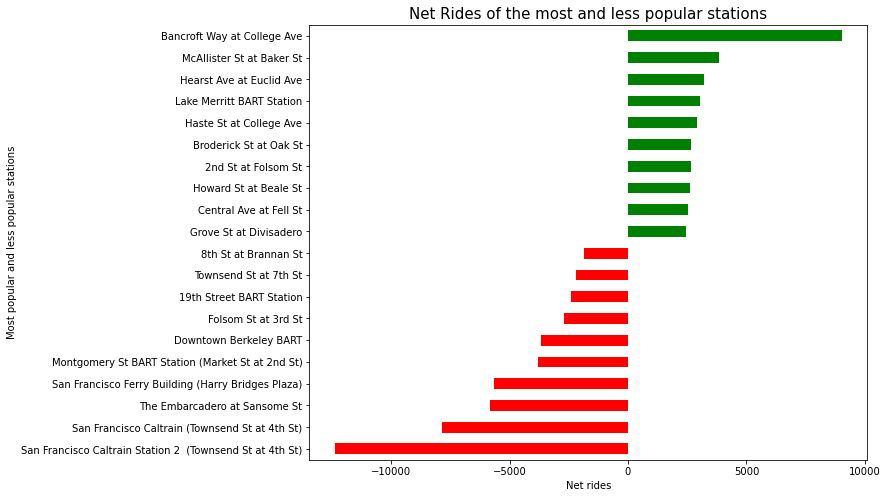

In [18]:
# Example python program to plot a horizontal bar chart
# import pandas as pd

import matplotlib.pyplot as plot

popularityChart  = pd.DataFrame(data = counts_combine);

wert = counts_combine['diff']
color = (wert > 0).apply(lambda x: 'g' if x else 'r')

popularityChart.plot.barh(x='station_name', y='diff', color = color, figsize=(10,8), legend=None);
plot.xlabel('Net rides', size = 10)
plot.ylabel('Most popular and less popular stations', size = 10)
plot.title("Net Rides of the most and less popular stations", fontsize = 15)
# counts_combine['diff'].plot(kind='barh', color = counts_combine.positive.map({True: 'g', False: 'r'}))
# plot.legend(loc = 'upper center', bbox_to_anchor = (0.5,-0.1), ncol = 3, fancybox = True, shadow = True)

plot.savefig('NetRides.jpg')
plot.show(block=True);
